## Table of Contents:

<ul>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#Importing-necessary-Libraries" target="_self">Importing necessary Libraries</a>
</ul>
</li>
<ul>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#0.-Read-the-Audio-Files" target="_self">0. Read the Audio Files</a>
<ul>
</ul>
</li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#1.-visualization" target="_self">1. Visualization</a>
<ul>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#1.1-Spectogram" target="_self">1.1 Spectogram</a></li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#1.2-mfcc" target="_self">1.2 MFCC</a></li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#1.3-Silence-Removal" target="_self">1.3 Silence Removal</a></li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#1.4-Features-extraction-steps" target="_self">1.4 Features extraction steps</a></li>
</ul>
</li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#2.-Voice-Activity-Detection-(-VAD-)" target="_self">2. Voice Activity Detection ( VAD )</a>
<ul>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#2.1-run-the-detector-on-windows-of-30-ms" target="_self">2.1 run the detector on windows of 30 ms </a></li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#2.2-Detect-Speech-instances-in-an-audio" target="_self">2.2 Detect Speech instances in an audio</a></li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#2.3-plot-the-range-of-samples-identified-as-speech-in-orange" target="_self">2.3 plot the range of samples identified as speech in orange</a></li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#len" target="_self">2.4. Length of recordings</a></li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#gmms" target="_self">2.5. Note on Gaussian Mixtures modeling</a></li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#components" target="_self">2.6. Frequency components across the words</a></li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#anomaly" target="_self">2.7. Anomaly detection</a></li>
</ul>
</li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#3.-Listen-to-the-speech-only-segments" target="_self">3. Listen to the speech only segments</a>
<ul>
</ul>
</li>
<li><a href="https://www.kaggle.com/atulanandjha/voice-activity-detection-using-webrtcvad#4.-Frequency-components-across-the-words" target="_self">4. Frequency components across the words</a>
<ul>
</ul>

### Importing necessary Libraries

In [1]:
import os
from os.path import isdir, join
from scipy.io import wavfile
from subprocess import check_output
from pathlib import Path
import pandas as pd


# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline


## 0. Read the Audio Files

### <span style="color: orange;">Here's abig deal. Earlier versions of this kernel could read .7z archive files directly. So, It was smooth like butter to run the kernel.</span>
### <span style="color: red;">But, recently kaggle is not able to read .7z archives directly after their config updates for the Notebook Environment. So, given below is a passage to overcome this hurdle.</span> 
### <span style="color: green;"> We need to extract the 7z archive into a directory and work on it. Later, we need to delete it especially, if <span style="color: blue;">no. of files > 500.</span> Read the instruction given below in three steps.</span>

### Step [#1]: Install Python packages in an internet-enabled notebook

In [2]:
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 81kB 3.4MB/s eta 0:00:011


### Step [#2]: Unpack your .7z file


In [3]:
from pyunpack import Archive
import shutil
if not os.path.exists('/kaggle/working/train/'):
    os.makedirs('/kaggle/working/train/')
Archive('/kaggle/input/train.7z').extractall('/kaggle/working/train/')
for dirname, _, filenames in os.walk('/kaggle/working/train/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/working/train/train/validation_list.txt
/kaggle/working/train/train/README.md
/kaggle/working/train/train/testing_list.txt
/kaggle/working/train/train/LICENSE
/kaggle/working/train/train/audio/no/ff21fb59_nohash_0.wav
/kaggle/working/train/train/audio/no/50f55535_nohash_1.wav
/kaggle/working/train/train/audio/no/55d3725a_nohash_0.wav
/kaggle/working/train/train/audio/no/f4504600_nohash_2.wav
/kaggle/working/train/train/audio/no/6c968bd9_nohash_4.wav
/kaggle/working/train/train/audio/no/9acd0254_nohash_1.wav
/kaggle/working/train/train/audio/no/4f5c0b28_nohash_1.wav
/kaggle/working/train/train/audio/no/d31d8dd7_nohash_1.wav
/kaggle/working/train/train/audio/no/e8c3c5ca_nohash_1.wav
/kaggle/working/train/train/audio/no/422f8cf1_nohash_0.wav
/kaggle/working/train/train/audio/no/e6db3894_nohash_0.wav
/kaggle/working/train/train/audio/no/9a356ab9_nohash_0.wav
/kaggle/working/train/train/audio/no/3f339c33_nohash_0.wav
/kaggle/working/train/train/audio/no/20d779bf_nohash_0.wav
/kaggle

### <span style="color: green;">ALL archived files have been extracted</span>

### Step [#3]: Then after you are finished working with the images you can delete them so that your commit will succeed (max number of files in working directory for a commit = 500)

In [4]:
shutil.make_archive('train/', 'zip', 'train')

'/kaggle/working/train.zip'

### <span style="color: blue;">Extracted files Zipped again in .zip format (readeable for kaggle kernels)</span>

In [5]:
# deleting unwanted extracted files to avoid memory overflow (maxlimit files = 500) while commiting.
!rm -rf kaggle/working/train/*

In [6]:
# Loading the trainig Input file.
train_audio_path = "/kaggle/working/train/train/audio"

In [7]:
"""
# It is just a checker code to validate the presence of file.

print(check_output(["ls", "../input/train/audio"]).decode("utf8"))
print(os.listdir("../input/train"))

"""


print(check_output(["ls", "/kaggle/working/train/train/audio"]).decode("utf8"))
print(os.listdir("/kaggle/working/train/train/audio/yes"))

_background_noise_
bed
bird
cat
dog
down
eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
wow
yes
zero

['ff21fb59_nohash_0.wav', '50f55535_nohash_1.wav', '55d3725a_nohash_0.wav', '1aeef15e_nohash_1.wav', '6c968bd9_nohash_4.wav', 'd31d8dd7_nohash_1.wav', '422f8cf1_nohash_0.wav', 'e6db3894_nohash_0.wav', '9a356ab9_nohash_0.wav', '3f339c33_nohash_0.wav', 'e4200516_nohash_2.wav', '5705a0f9_nohash_0.wav', '88a487ce_nohash_0.wav', 'a879a2c3_nohash_0.wav', '5195f0ec_nohash_0.wav', '96ab6565_nohash_2.wav', '54d9ccb5_nohash_0.wav', '1a673010_nohash_1.wav', '126403d4_nohash_1.wav', 'a827e3a1_nohash_0.wav', '2296b1af_nohash_0.wav', 'd197e3ae_nohash_3.wav', 'e71b4ce6_nohash_0.wav', 'ad6a46f1_nohash_0.wav', '4def68db_nohash_0.wav', '626e323f_nohash_0.wav', 'bc196f81_nohash_1.wav', 'f2b8fc18_nohash_0.wav', 'dc2222d7_nohash_0.wav', '0685264e_nohash_0.wav', '28ed6bc9_nohash_1.wav', '3cfc6b3a_nohash_0.wav', 'd94eb94f_nohash_0.wav', '15c563d7_n

In [8]:
# Example input file to be used here...
filename = '/yes/00f0204f_nohash_0.wav'

In [9]:
dirs = [f for f in os.listdir(train_audio_path) if isdir(join(train_audio_path, f))]
dirs.sort()
print('Number of labels: ' + str(len(dirs)))

Number of labels: 31


# Audio Features.

#### <span style="color: red;"> sample_rate, samples = wavfile.read(str(train_audio_path) + filename) </span>

#### <span style="color: blue;">The above code line works fine for everything except **Librosa** library MFCC functionality. So, we'll read wave files using librosa only.</span>

### Must to read samples in librosa format. Other wise "librosa" error: <span style="color : red">data must be in floating format</span>

In [10]:
samples, sample_rate = librosa.load(str(train_audio_path)+filename)

## 1. Visualization

There are two theories of a [human hearing - place](https://en.wikipedia.org/wiki/Place_theory_(hearing) (frequency-based) and [temporal](https://en.wikipedia.org/wiki/Temporal_theory_(hearing) In speech recognition, I see two main tendencies - to input spectrogram (frequencies), and more sophisticated features MFCC - Mel-Frequency Cepstral Coefficients, PLP. You rarely work with raw, temporal data.

Let's visualize some recordings!

### 1.1 Spectogram 

Define a function that calculates spectrogram.

Note, that we are taking logarithm of spectrogram values. It will make our plot much more clear, moreover, it is strictly connected to the way people hear. We need to assure that there are no 0 values as input to logarithm.


In [11]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Frequencies are in range (0, 8000) according to Nyquist theorem.

Let's plot it:

Text(0.5, 0, 'Seconds')

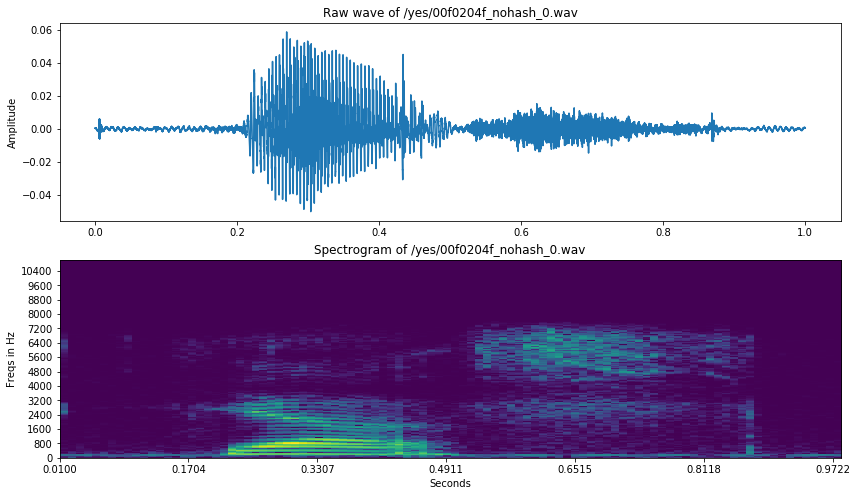

In [12]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

normalizing the audio data. Always a good plan if we gonna feed it into NN.

In [13]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

There is an interesting fact to point out. We have ~160 features for each frame, frequencies are between 0 and 8000. It means, that one feature corresponds to 50 Hz. However, frequency resolution of the ear is 3.6 Hz within the octave of 1000 – 2000 Hz It means, that people are far more precise and can hear much smaller details than those represented by spectrograms like above.

### 1.2 MFCC

If you want to get to know some details about MFCC take a look at this great tutorial. MFCC explained You can see, that it is well prepared to imitate human hearing properties.

You can calculate Mel power spectrogram and MFCC using for example librosa python package.


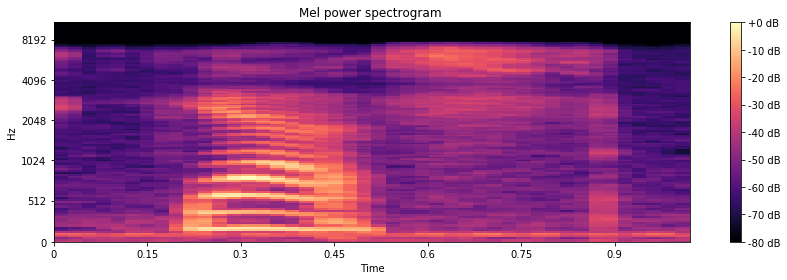

In [14]:
# From this tutorial
# https://github.com/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb
S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

#### Now delta- mfcc

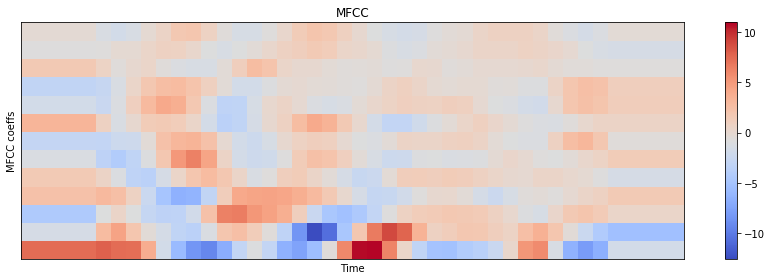

In [15]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In classical, but still state-of-the-art systems, MFCC or similar features are taken as the input to the system instead of spectrograms.

However, in end-to-end (often neural-network based) systems, the most common input features are probably raw spectrograms, or mel power spectrograms. For example MFCC decorrelates features, but NNs deal with correlated features well. Also, if you'll understand mel filters, you may consider their usage sensible.a

It is your decision which to choose!

### 1.3 Silence Removal

In [16]:
samples_cut = samples[4000:13000]
ipd.Audio(samples_cut, rate=sample_rate)

#### We can agree that the entire word can be heard. It is impossible to cut all the files manually and do this basing on the simple plot. But you can use for example webrtcvad package to have a good VAD.

Let's plot it again, together with guessed alignment of 'y' 'e' 's' graphems

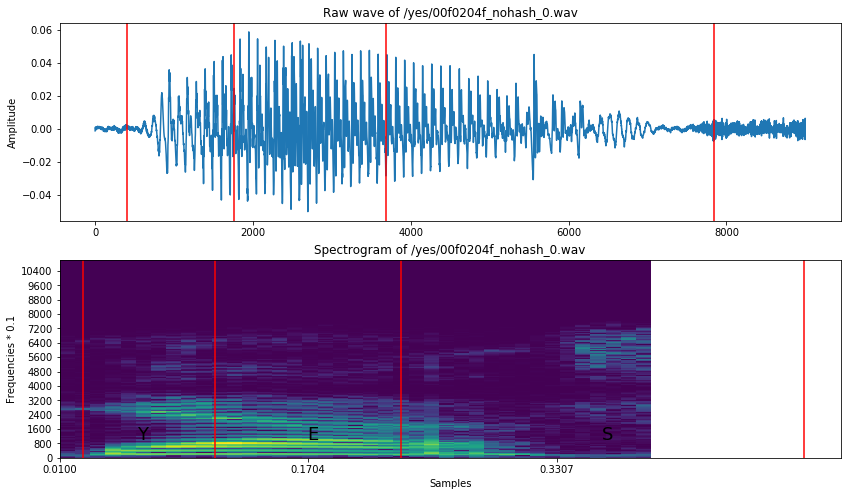

In [17]:
freqs, times, spectrogram_cut = log_specgram(samples_cut, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(samples_cut)

ax2 = fig.add_subplot(212)
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Frequencies * 0.1')
ax2.set_xlabel('Samples')
ax2.imshow(spectrogram_cut.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.text(0.06, 1000, 'Y', fontsize=18)
ax2.text(0.17, 1000, 'E', fontsize=18)
ax2.text(0.36, 1000, 'S', fontsize=18)

xcoords = [0.025, 0.11, 0.23, 0.49]
for xc in xcoords:
    ax1.axvline(x=xc*16000, c='r')
    ax2.axvline(x=xc, c='r')



### 1.4 Features extraction steps

A generalized feature extraction algorithm for an audio data sample be like that:

    1. Resampling
    2. VAD
    3. Maybe padding with 0 to make signals be equal length
    4. Log spectrogram (or MFCC, or PLP)
    5. Features normalization with mean and std
    6. Stacking of a given number of frames to get temporal information

It's a pity it can't be done in notebook. It has not much sense to write things from zero, and everything is ready to take, but in packages, that can not be imported in Kernels.


## 2. Voice Activity Detection ( VAD )

### use the webrtcvad library to identify segments as speech or not

In [18]:
!pip install webrtcvad

     |████████████████████████████████| 71kB 2.5MB/s eta 0:00:011
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp36-cp36m-linux_x86_64.whl size=80376 sha256=4829d0833dd15ee977803cf6806cff9ede89c29915ca55bc8db1f343ad3b0dc0
  Stored in directory: /root/.cache/pip/wheels/44/2a/18/bd1aec41cac7c3051fe95d92a6ed446122ea31dc713c432fa1
Successfully built webrtcvad


In [19]:
import webrtcvad

#### reading the samples and sample_rate feature again to make them compatible with the webrtcvad library. ( it reads at sample_rate = 16000, 32000, 48000; but we had sample_rate = 22050 with librosa)

In [20]:
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

In [21]:
vad = webrtcvad.Vad()

# set aggressiveness from 0 to 3
vad.set_mode(3)

### convert samples to raw 16 bit per sample stream needed by webrtcvad( there are other options available too , like 32 )

In [22]:
import struct
raw_samples = struct.pack("%dh" % len(samples), *samples)

### 2.1 run the detector on windows of 30 ms 
[example here](https://github.com/wiseman/py-webrtcvad/blob/master/example.py)

In [23]:
window_duration = 0.03 # duration in seconds

samples_per_window = int(window_duration * sample_rate + 0.5)

bytes_per_sample = 2

### 2.2 Detect Speech instances in an audio

In [24]:
segments = []

for start in np.arange(0, len(samples), samples_per_window):
    stop = min(start + samples_per_window, len(samples))
    
    is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample], 
                              sample_rate = sample_rate)

    segments.append(dict(
       start = start,
       stop = stop,
       is_speech = is_speech))
    
    

![alexa meme](https://miro.medium.com/max/1000/1*pdlUc6RHZGhi9VxfcAMhNQ.png)

### 2.3 plot the range of samples identified as speech in <span style="color : red;">orange</span>

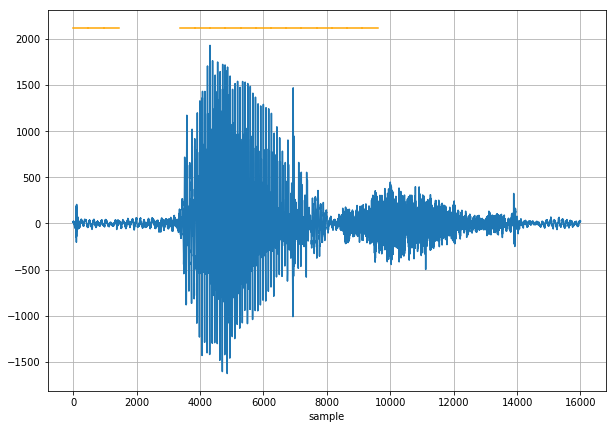

In [25]:
plt.figure(figsize = (10,7))
plt.plot(samples)

ymax = max(samples)


# plot segment identifed as speech
for segment in segments:
    if segment['is_speech']:
        plt.plot([ segment['start'], segment['stop'] - 1], [ymax * 1.1, ymax * 1.1], color = 'orange')

plt.xlabel('sample')
plt.grid()

## 3. Listen to the speech only segments

In [26]:
speech_samples = np.concatenate([ samples[segment['start']:segment['stop']] for segment in segments if segment['is_speech']])

import IPython.display as ipd
ipd.Audio(speech_samples, rate=sample_rate)

#### Till now we have processed for a single audio of any one word : <span style="color : blue;">YES</span> here.

#### Now, its time to have an overall view on other words also. So, lets visualize frequency components for other words as well.

## 4. Frequency components across the words

### plotting for first 8 words only to avoid clumsy tight plots.

In [27]:
def violinplot_frequency(dirs, freq_ind):
    """ Plot violinplots for given words (waves in dirs) and frequency freq_ind
    from all frequencies freqs."""

    spec_all = []  # Contain spectrograms
    ind = 0
    # taking first 8 words only to keep the plots clean and unclumsy.
    for direct in dirs[:8]:
        spec_all.append([])

        waves = [f for f in os.listdir(join(train_audio_path, direct)) if
                 f.endswith('.wav')]
        for wav in waves[:100]:
            sample_rate, samples = wavfile.read(
                train_audio_path + '/' + direct + '/' + wav)
            freqs, times, spec = log_specgram(samples, sample_rate)
            spec_all[ind].extend(spec[:, freq_ind])
        ind += 1

    # Different lengths = different num of frames. Make number equal
    minimum = min([len(spec) for spec in spec_all])
    spec_all = np.array([spec[:minimum] for spec in spec_all])

    plt.figure(figsize=(13,7))
    plt.title('Frequency ' + str(freqs[freq_ind]) + ' Hz')
    plt.ylabel('Amount of frequency in a word')
    plt.xlabel('Words')
    sns.violinplot(data=pd.DataFrame(spec_all.T, columns=dirs[:8]))
    plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: WavFileWarning:

Chunk (non-data) not understood, skipping it.



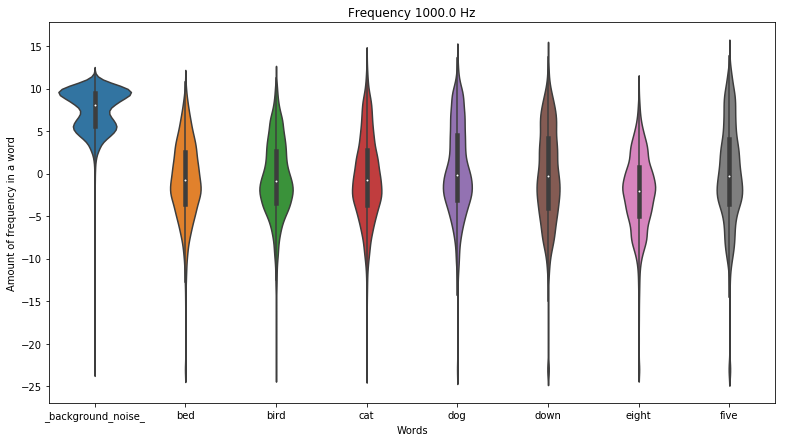

In [28]:
violinplot_frequency(dirs, 20)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: WavFileWarning:

Chunk (non-data) not understood, skipping it.



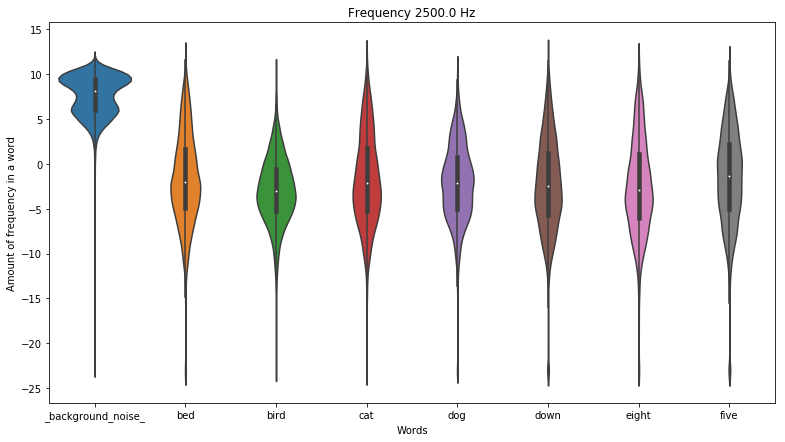

In [29]:
violinplot_frequency(dirs, 50)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: WavFileWarning:

Chunk (non-data) not understood, skipping it.



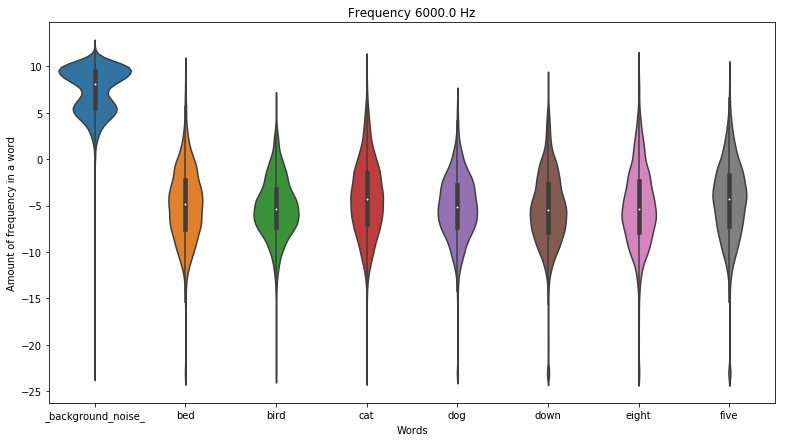

In [30]:
violinplot_frequency(dirs, 120)